In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
sess = tf.InteractiveSession()

In [5]:
saver = tf.train.import_meta_graph('mnist/conv_99_new.meta')

In [6]:
saver.restore(sess,'mnist/conv_99_new')

INFO:tensorflow:Restoring parameters from mnist/conv_99_new


In [7]:
print(tf.global_variables())

[<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(3136, 1024) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(1024, 10) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>, <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable/Adam:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable/Adam_1:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2/Adam:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_2

In [8]:
keep_prob = tf.get_default_graph().get_tensor_by_name("keep_prob:0")
x = tf.get_default_graph().get_tensor_by_name("x:0")
y_conv = tf.get_default_graph().get_tensor_by_name("y_conv:0")
y_conv_s = tf.get_default_graph().get_tensor_by_name("y_conv_s:0")

In [9]:
num_to_turn_into = 8
var_grad = tf.gradients(y_conv[:,num_to_turn_into], x)[0]
grad_eval = sess.run(var_grad, feed_dict={x: mnist.train.images[0].reshape([1,784]), keep_prob: 1.0})
grad_eval

array([[ 1.77788317e-01,  9.12529454e-02,  2.39589542e-01,
         1.04840696e-01, -4.08209503e-01,  2.92413924e-02,
        -1.69675067e-01, -1.36918038e-01, -7.01406896e-02,
        -2.06165344e-01, -3.77907939e-02, -6.45772040e-01,
        -3.77410054e-01, -1.27341330e-01, -4.51796234e-01,
         6.48267865e-02, -9.21885893e-02, -1.85169190e-01,
        -2.35685229e-01, -1.23805180e-01, -3.48767102e-01,
        -1.90494448e-01,  1.38598502e-01, -1.66049659e-01,
         1.15863226e-01, -1.54325753e-01, -9.84240249e-02,
        -2.63734609e-02,  1.11695454e-01, -2.23212004e-01,
         2.86679387e-01,  1.21172778e-02, -1.47229388e-01,
        -1.74016520e-01,  1.45335764e-01, -8.01868141e-02,
        -4.88711149e-02,  6.06972128e-02,  1.50175989e-01,
         2.26772979e-01, -1.18318945e-02, -1.05321802e-01,
        -1.52456552e-01,  6.92212582e-03,  6.12084270e-02,
        -2.08203673e-01, -2.63639569e-01, -1.82568803e-01,
        -3.73282820e-01, -1.29837483e-01,  4.39904705e-0

In [10]:
np.argwhere(np.argwhere(mnist.train.labels == 1) == 0)

array([[    0,     0],
       [    7,     1],
       [   10,     1],
       ...,
       [54952,     1],
       [54972,     1],
       [54987,     1]])

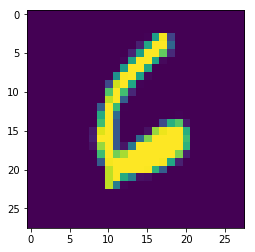

In [11]:
plt.imshow(mnist.train.images[3].reshape([28,28]))

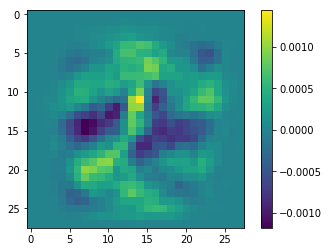

In [19]:
plt.imshow(grad_eval[54973,:].reshape([28,28]))
plt.colorbar()

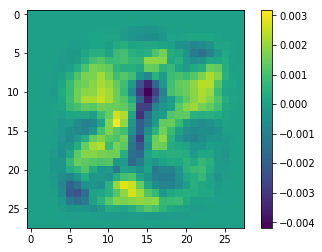

In [20]:
plt.imshow(grad_eval[12,:].reshape([28,28]))
plt.colorbar()

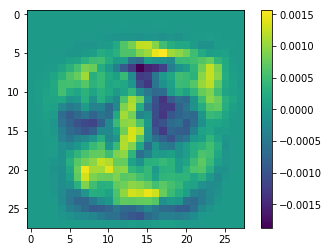

In [50]:
plt.imshow(-grad_eval[12,:].reshape([28,28]) + grad_eval[0,:].reshape([28,28]))
plt.colorbar()

# Create a function which, given a gradient vector, projects another vector onto the orthogonal complement of the gradient vector

In [10]:
test_vec = np.array([1,1])

In [11]:
def proj(vec, proj_vec):
    #computes the orthogonal projection of proj_vec onto the orthogonal complement of vec
    x = np.matrix(vec).T
    P = x * x.T / (x.T * x) # projector onto the space spanned by x
    Pperp = np.identity(len(vec)) - P # projector onto x's orthogonal complement
    return np.asarray(np.matrix(proj_vec)*P)[0], np.asarray(np.matrix(proj_vec)*Pperp)[0] 

In [21]:
proj(test_vec, np.array([1,-1]))

(array([0., 0.]), array([ 1., -1.]))

# For a given mnist picture, make a random walk in orthogonal space

In [12]:
def chop(pic):
    copy_pic = np.copy(pic)
    copy_pic[copy_pic > 1] = 1
    copy_pic[copy_pic < 0] = 0.0
    return copy_pic

In [13]:
def reset(pic):
    copy_pic = np.copy(pic)
    copy_pic[copy_pic > 0.95] = 0.0
    return copy_pic

In [14]:
def normalize(pic):
    copy_pic = np.copy(pic)
    neg = (copy_pic < 0).any()
    great_one = (copy_pic > 1).any()
    if neg and great_one:
        copy_pic = (copy_pic - min(copy_pic))/(max(copy_pic) - min(copy_pic))
    elif neg:
        copy_pic = (copy_pic - min(copy_pic))/(1.0 - min(copy_pic))
    elif great_one:
        copy_pic = copy_pic/max(copy_pic)
    
    return copy_pic

In [15]:
def compute_sum_grad(curr_pic):
    c = []
    for i in range(10):
        var_grad = tf.gradients(ys[:,i], x)[0]
        g = sess.run(var_grad, feed_dict={x: curr_pic.reshape([1,len(curr_pic)])})
        c.append(g)
    return np.asarray(c).reshape([10,784]).sum(axis=0)

In [216]:
def create_vec_tensor(categories, target = y_conv_s):
    vec_tens = []
    for i in range(categories):
            vec_tens.append(tf.gradients(target[:,i], x)[0])
    return vec_tens

In [210]:
vec_tens = create_vec_tensor(10)

In [214]:
def compute_vec_grad(pic, vec_tens):
    var_grad = sess.run(vec_tens, feed_dict={x: pic.reshape([1,len(pic)]), keep_prob: 1.0})
    return np.asarray(var_grad).reshape([10, 784])

In [34]:
test = compute_vec_grad(mnist.train.images[54973])
np.dot(test,mnist.train.images[54973])

In [16]:
def shift_pic(pic, shift=4):
    return np.roll(pic.reshape([28,28]), shift, axis=1).reshape([784,])

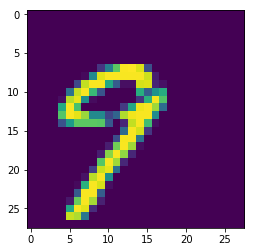

In [17]:
plt.imshow(np.roll(mnist.train.images[54973].reshape([28,28]), -4, axis=1))

In [215]:
compute_vec_grad(mnist.train.images[54973], vec_tens)

array([[ 5.32729971e-11, -4.31161579e-10, -6.52982807e-11, ...,
        -2.49156501e-10, -2.38398551e-10, -6.63242725e-11],
       [ 8.38077663e-11, -1.65611969e-11,  7.74976971e-10, ...,
         3.98271832e-11, -2.10865658e-10, -7.37002265e-11],
       [ 7.68955843e-10, -1.14365306e-09,  2.34058328e-11, ...,
        -3.88240412e-10, -9.33146338e-10,  1.03320078e-11],
       ...,
       [ 1.01089950e-04, -1.88228412e-04,  1.06675507e-04, ...,
         8.94231998e-05, -1.53542322e-04, -5.49057877e-05],
       [ 1.40680978e-08, -1.53176899e-07, -2.86951092e-07, ...,
         3.86417263e-08, -1.17586154e-07,  4.50633664e-08],
       [-1.01137448e-04,  1.88388629e-04, -1.06360691e-04, ...,
        -8.95236226e-05,  1.53683388e-04,  5.48294265e-05]], dtype=float32)

In [68]:
def shift_walk(start_pic, sess, target_pic=None, num_steps = 40):
    #var_grad = tf.gradients(tf.reduce_sum(ys[:,0:-1],axis=1), x)[0]
    curr_pic = start_pic
    pic_trajectory = []
    loss_trajectory = []
    pic_trajectory.append(start_pic)
    if target_pic is None:
        print('using random target vec')
        dir_vec = np.random.random_sample(len(start_pic))
        dir_vec = dir_vec/(np.linalg.norm(dir_vec))
    else:
        print('using a target vec')
        dir_vec = target_pic - start_pic
        #dir_vec = dir_vec/(np.linalg.norm(dir_vec))
      
    for shift in range(4):
        target_pic = shift_pic(start_pic, shift=shift+1)
        dir_vec = target_pic - curr_pic 
        sub_step = int(num_steps/4)
        curr_interp_pic = curr_pic
        for j in range(sub_step):
            #shift = -int(np.floor(i/(num_steps/4)))
            curr_pic = curr_interp_pic + (j+1)/sub_step*dir_vec

            pic_trajectory.append(curr_pic)
            loss_trajectory.append(y_conv_s.eval({x: curr_pic.reshape([1,len(start_pic)]), keep_prob: 1.0}))
    return np.asarray(pic_trajectory), None , np.asarray(loss_trajectory)

In [62]:
def orth_walk(start_pic, sess, target_pic=None, perp = 0, par = 0, num_steps = 40):
    #var_grad = tf.gradients(tf.reduce_sum(ys[:,0:-1],axis=1), x)[0]
    var_grad = tf.gradients(y_conv_s[:,0], x)[0]
    var_grad_keep = tf.gradients(y_conv_s[:,0], x)[0]
    curr_pic = start_pic
    pic_trajectory = []
    grad_trajectory = []
    loss_trajectory = []
    pic_trajectory.append(start_pic)
    if target_pic is None:
        print('using random target vec')
        dir_vec = np.random.random_sample(len(start_pic))
        dir_vec = dir_vec/(np.linalg.norm(dir_vec))
    else:
        print('using a target vec')
        dir_vec = target_pic - start_pic
        #dir_vec = dir_vec/(np.linalg.norm(dir_vec))
        
    #interpolation:
    if (perp == 0) and (par == 0):
        for i in range(num_steps):
            curr_pic = start_pic + (i+1)/num_steps*dir_vec
            
            pic_trajectory.append(curr_pic)
            loss_trajectory.append(y_conv_s.eval({x: curr_pic.reshape([1,len(start_pic)]), keep_prob: 1.0}))
        return np.asarray(pic_trajectory), None , np.asarray(loss_trajectory)
    #orth_walk:
    else:
        
        for i in range(num_steps):
            print('curr_pic is:')
            print(curr_pic.reshape([1,len(start_pic)]))
            #curr_grad = compute_sum_grad(curr_pic)
            curr_grad = sess.run(var_grad, feed_dict={x: curr_pic.reshape([1,len(start_pic)]), keep_prob: 1.0})
            curr_grad = curr_grad/(np.linalg.norm(curr_grad))


            print('grad is')
            print(curr_grad)
            curr_pic = np.asarray(curr_pic + perp*proj(curr_grad, dir_vec)[1])
            curr_pic = normalize(curr_pic)
            #curr_pic = np.asarray(curr_pic + perp*dir_vec)

            curr_grad_keep = sess.run(var_grad_keep, feed_dict={x: curr_pic.reshape([1,len(start_pic)]), keep_prob: 1.0})
            curr_grad_keep = curr_grad_keep/(np.linalg.norm(curr_grad_keep))

            curr_pic = np.asarray(curr_pic + par*curr_grad_keep)


            print('proj is')
            print(proj(curr_grad, dir_vec))
            #curr_pic = chop(curr_pic)
            curr_pic = normalize(curr_pic)
    #         if i % 20 == 19:
    #             curr_pic = reset(curr_pic)
    #         print("orth proj")
    #         print(orth_proj(curr_grad, random_vec))
    #         print("curr pic")
    #         print(curr_pic)
    #         print(curr_pic.shape)
            pic_trajectory.append(curr_pic)
            grad_trajectory.append(curr_grad)
            loss_trajectory.append(y_conv_s.eval({x: curr_pic.reshape([1,len(start_pic)]), keep_prob: 1.0}))

            dir_vec = target_pic - curr_pic
            dir_vec = dir_vec/(np.linalg.norm(dir_vec))
        return np.asarray(pic_trajectory), np.asarray(grad_trajectory), np.asarray(loss_trajectory)

In [85]:
y_conv_s.eval({x: shift_pic(mnist.train.images[7],shift=-2).reshape([1,784]), keep_prob: 1.0})

array([[9.9999547e-01, 2.8636480e-08, 3.6133717e-06, 8.4838347e-10,
        3.1829828e-08, 9.5836028e-10, 1.0202397e-08, 7.8095547e-07,
        2.5865724e-08, 9.7155379e-08]], dtype=float32)

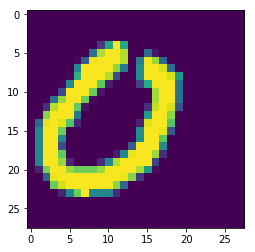

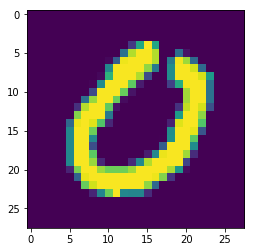

using a target vec
using a target vec


In [69]:
start_pic = shift_pic(mnist.train.images[7],shift=-4)
target_pic = mnist.train.images[7]
plt.imshow(start_pic.reshape([28,28]))
plt.show()
plt.imshow(target_pic.reshape([28,28]))
plt.show()
t = orth_walk(start_pic=start_pic, target_pic=target_pic, sess=sess)
s = shift_walk(start_pic=start_pic, target_pic=target_pic, sess=sess)

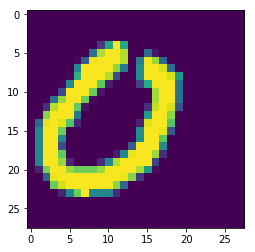

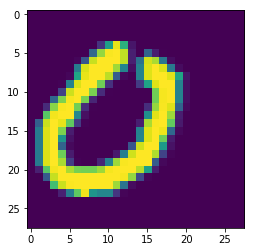

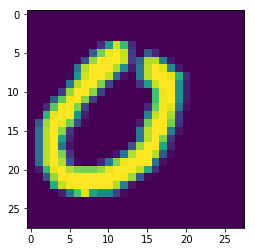

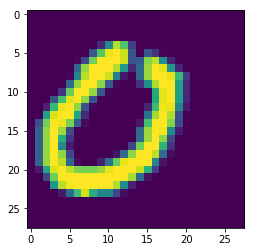

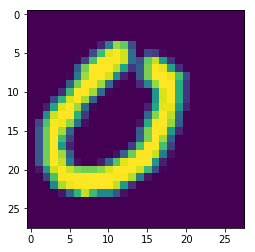

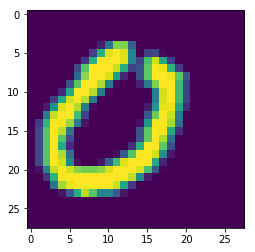

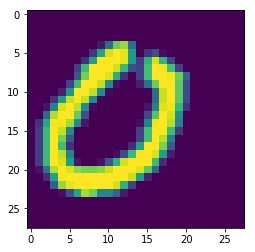

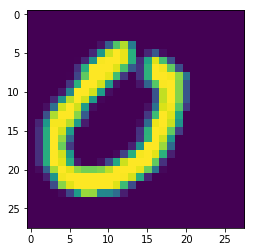

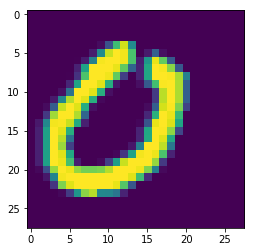

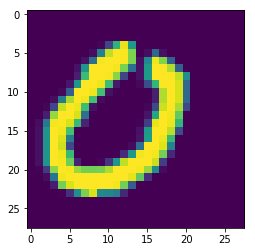

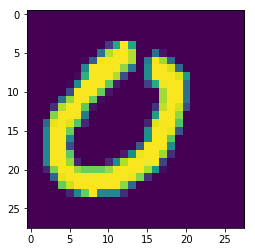

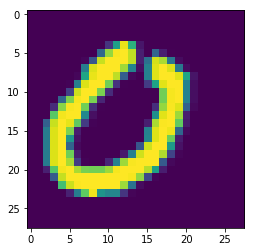

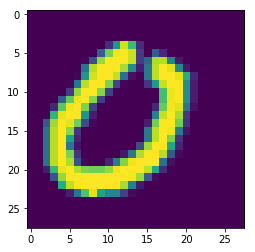

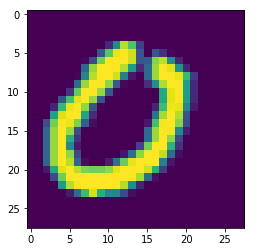

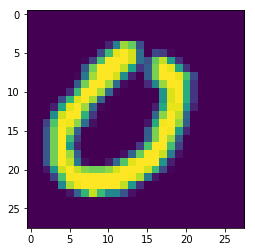

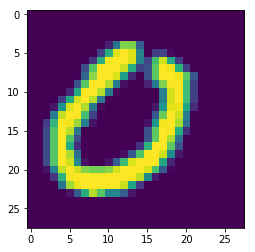

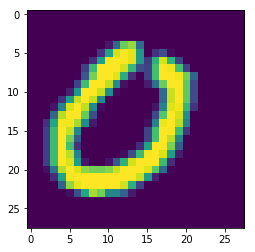

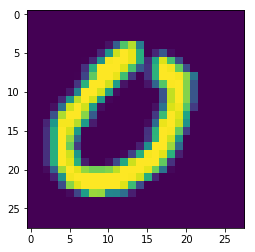

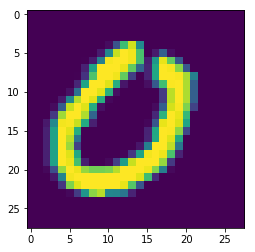

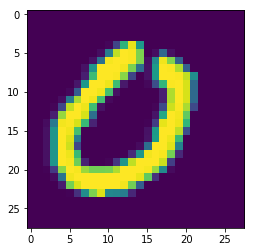

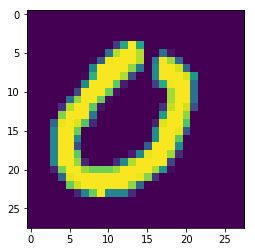

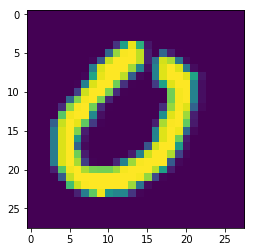

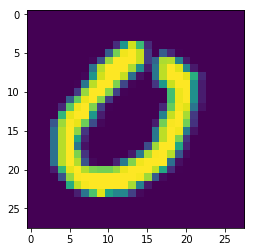

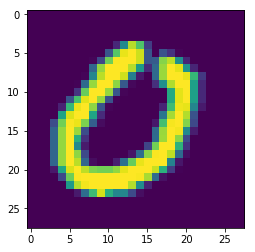

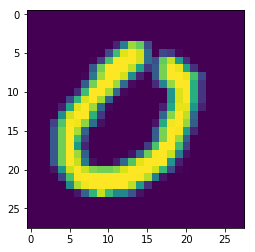

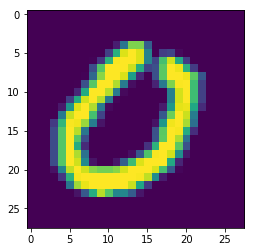

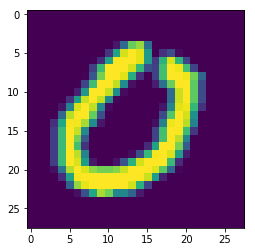

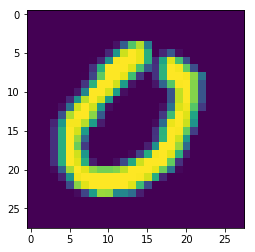

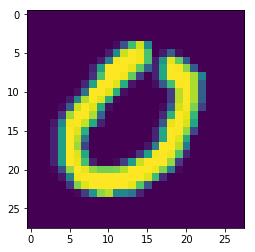

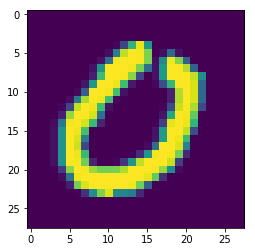

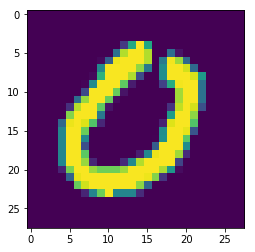

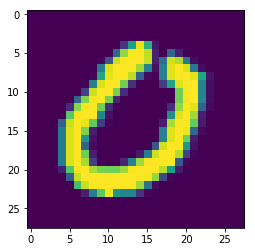

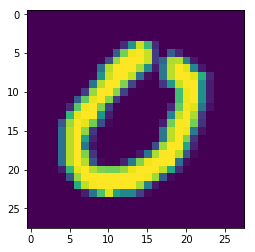

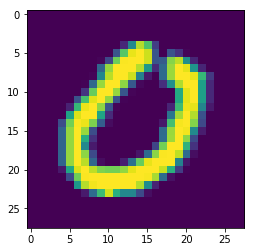

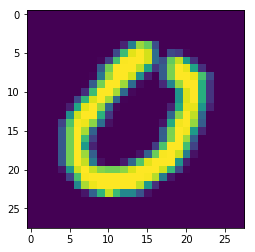

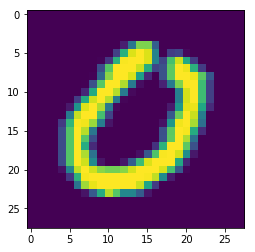

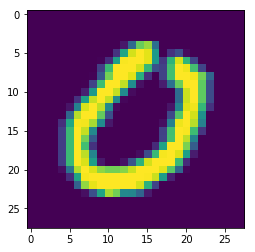

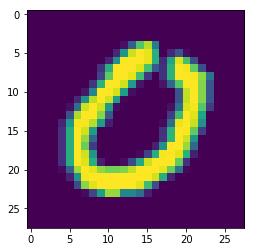

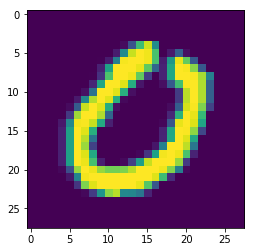

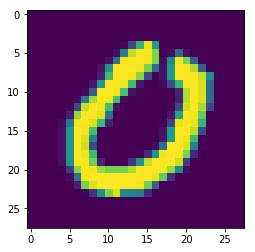

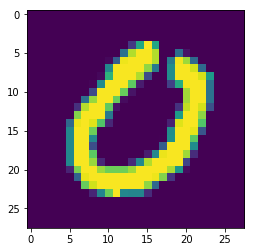

IndexError: index 41 is out of bounds for axis 0 with size 41

In [70]:
for i in range(500):
    plt.imshow(s[0][i].reshape([28,28]))
    plt.show()

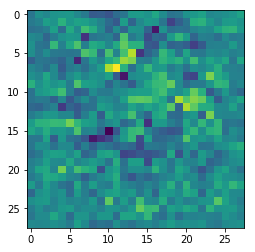

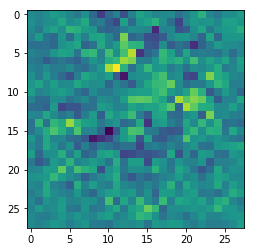

/Users/michaelmcdermott/.local/share/virtualenvs/python-_2MbXz7b/lib/python3.6/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/Users/michaelmcdermott/.local/share/virtualenvs/python-_2MbXz7b/lib/python3.6/site-packages/matplotlib/image.py:406: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/Users/michaelmcdermott/.local/share/virtualenvs/python-_2MbXz7b/lib/python3.6/site-packages/matplotlib/image.py:412: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/Users/michaelmcdermott/.local/share/virtualenvs/python-_2MbXz7b/lib/python3.6/site-packages/matplotlib/image.py:417: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/Users/michaelmcdermott/.local/share/virtualenvs/python-_2MbXz7b/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to

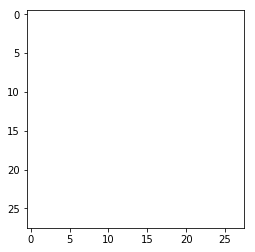

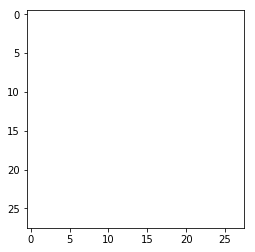

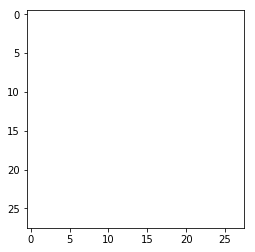

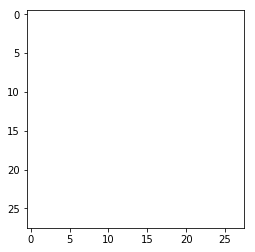

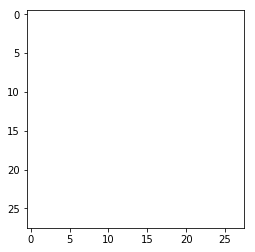

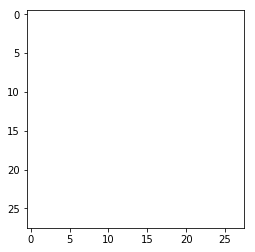

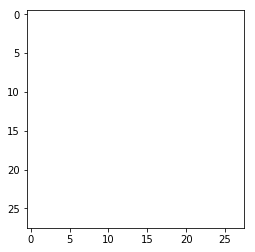

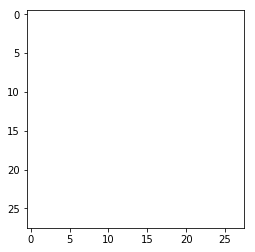

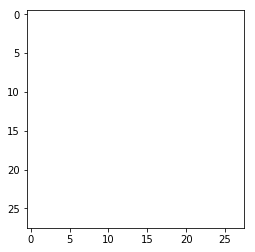

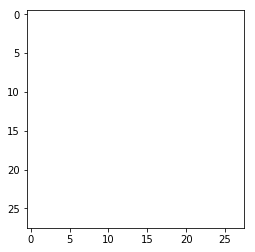

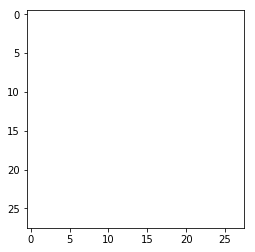

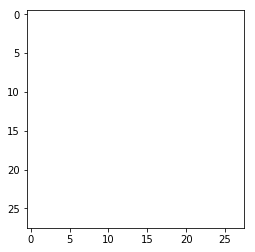

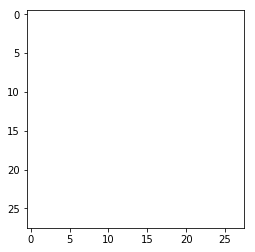

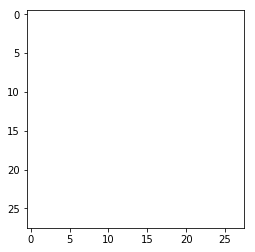

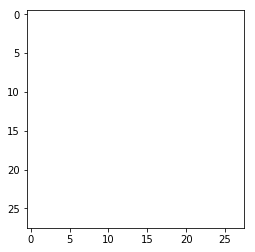

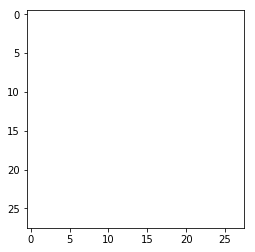

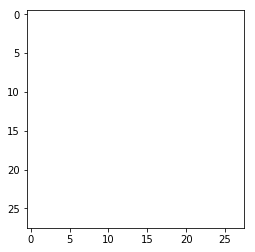

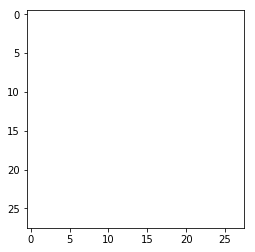

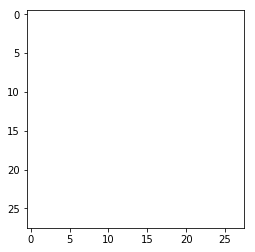

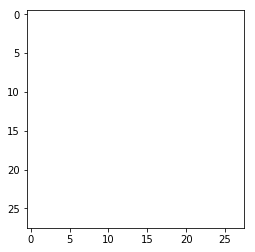

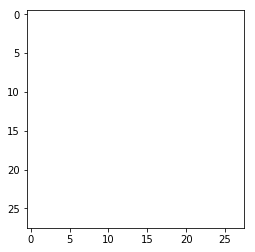

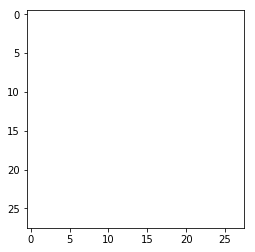

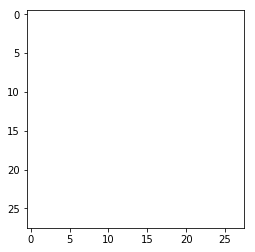

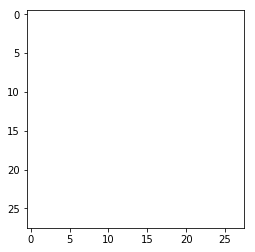

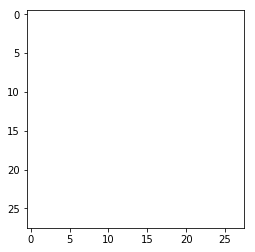

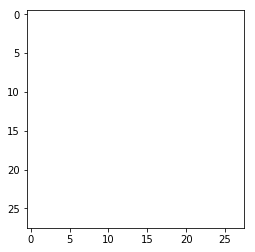

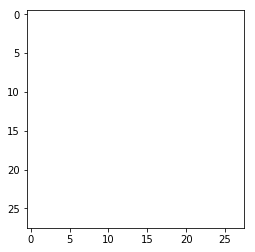

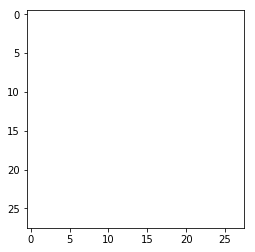

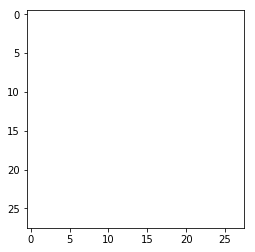

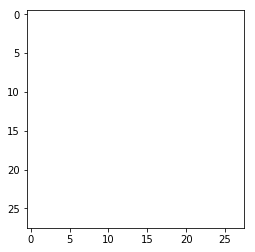

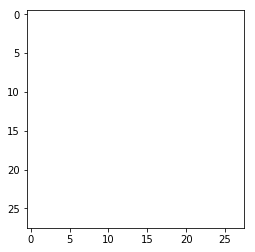

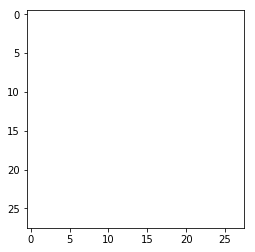

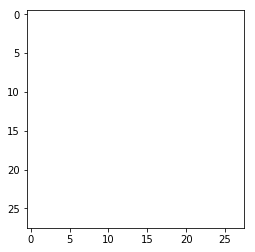

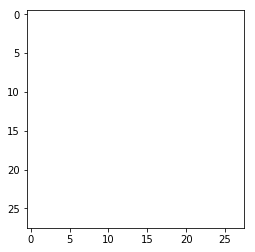

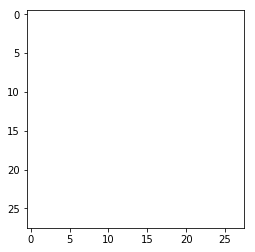

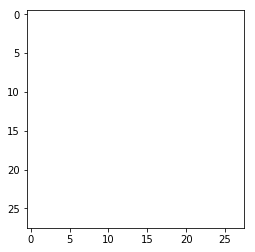

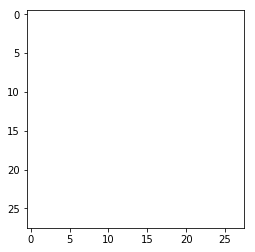

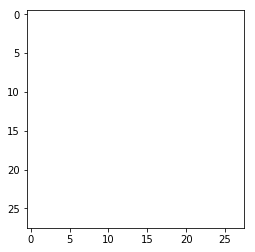

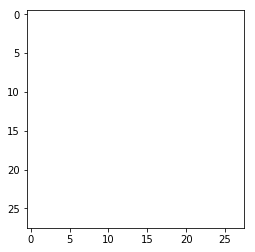

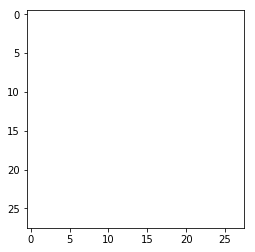

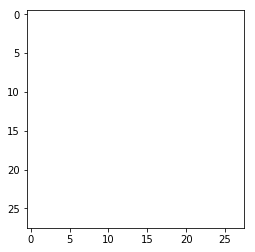

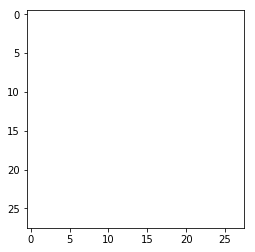

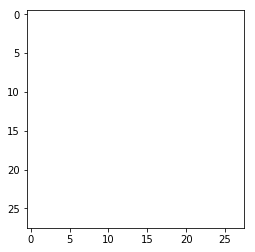

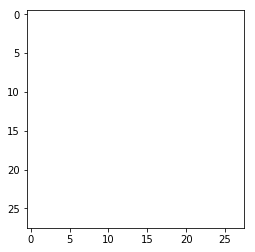

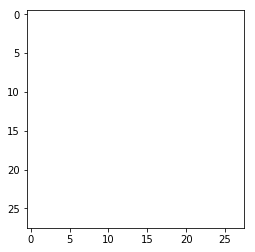

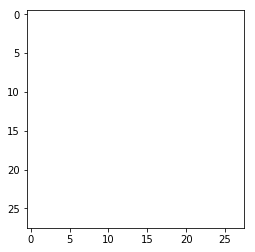

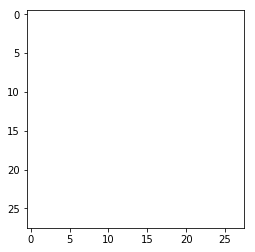

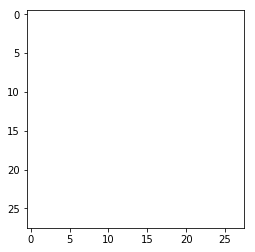

IndexError: index 50 is out of bounds for axis 0 with size 50

In [128]:
for i in range(500):
    plt.imshow(t[1][i].reshape([28,28]))
    plt.show()

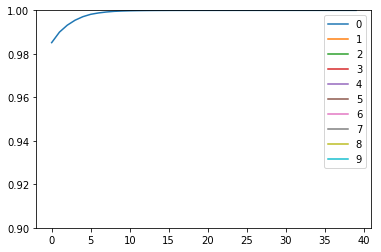

In [153]:
xaxis = range(len(t[0]))
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,0], label='0')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,1], label='1')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,2], label='2')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,3], label='3')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,4], label='4')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,5], label='5')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,6], label='6')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,7], label='7')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,8], label='8')
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,9], label='9')
plt.ylim([0.9,1])
plt.legend()
plt.show()

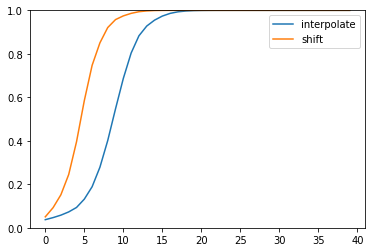

In [149]:
xaxis = range(len(t[0]))
plt.plot(xaxis[:-1],t[2].reshape([t[2].shape[0], 10])[:,0], label='interpolate')
plt.plot(xaxis[:-1],s[2].reshape([s[2].shape[0], 10])[:,0], label='shift')
plt.ylim([0.,1])
#plt.xlim([9,14])
plt.legend()
plt.show()

# Let's compute some distances

In [218]:
def distance(pic1, pic2, vec_tens=vec_tens):
    stand = np.sum((pic2-pic1)**2)
    
    vec_grad_pic = compute_vec_grad(pic1, vec_tens)
    vec_grad_pic = vec_grad_pic/np.sqrt(np.sum(vec_grad_pic**2, axis=1)).reshape([10,1])
    graddist = np.sum((np.dot(vec_grad_pic, (pic2-pic1)))**2)
    
    return np.sqrt(stand + graddist), stand, graddist, vec_grad_pic

In [157]:
apa = np.asarray([[1,2,3], [0,1,2]])

In [161]:
apa/np.sum(apa, axis = 1).reshape([2,1])

array([[0.16666667, 0.33333333, 0.5       ],
       [0.        , 0.33333333, 0.66666667]])

In [52]:
start_pic = shift_pic(mnist.train.images[7],shift=4)
target_pic = mnist.train.images[9]
distance(start_pic, target_pic)

(12.390356, 152.98996, 0.53097296)

In [77]:
np.roll(np.asarray([1,2,3]),shift=-1)

array([2, 3, 1])

In [81]:
t[0][1,:]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [219]:
tdist = []
sdist = []
tempt = np.roll(t[0], shift=-1, axis=0)
temps = np.roll(s[0], shift=-1, axis=0)
for i in range((t[0].shape)[0]):
    tdist.append(distance(t[0][i,:],tempt[i,:]))
    sdist.append(distance(s[0][i,:],temps[i,:]))
    print("done round: ", i)

done round:  0
done round:  1
done round:  2
done round:  3
done round:  4
done round:  5
done round:  6
done round:  7
done round:  8
done round:  9
done round:  10
done round:  11
done round:  12
done round:  13
done round:  14
done round:  15
done round:  16
done round:  17
done round:  18
done round:  19
done round:  20
done round:  21
done round:  22
done round:  23
done round:  24
done round:  25
done round:  26
done round:  27
done round:  28
done round:  29
done round:  30
done round:  31
done round:  32
done round:  33
done round:  34
done round:  35
done round:  36
done round:  37
done round:  38
done round:  39
done round:  40


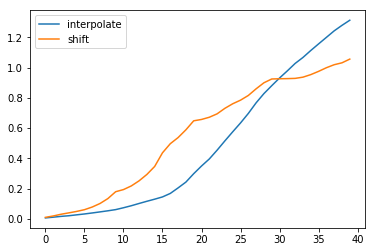

In [221]:
tdist2 = [tdist[i][2] for i in range(len(tdist)-1)]
sdist2 = [sdist[i][2] for i in range(len(tdist)-1)]
xaxis = range(len(tdist2))
plt.plot(xaxis, np.cumsum(np.asarray(tdist2)), label='interpolate')
plt.plot(xaxis, np.cumsum(np.asarray(sdist2)), label='shift')
plt.legend()
plt.show()

In [184]:
xaxis = range(np.asarray(tdist).shape[0])
plt.plot(xaxis, np.cumsum(np.asarray(tdist)[:,2]), label='interpolate')
plt.plot(xaxis, np.cumsum(np.asarray(sdist)[:,2]), label='shift')
plt.legend()
plt.show()

ValueError: setting an array element with a sequence.

In [148]:
t[2]

array([[[3.73472236e-02, 3.46289217e-01, 5.44974148e-01, 1.59781263e-03,
         3.63529398e-04, 3.20557865e-06, 5.68367723e-05, 6.58660308e-02,
         9.87532330e-05, 3.40331858e-03]],

       [[4.68852594e-02, 3.01163226e-01, 5.71601152e-01, 1.54518080e-03,
         3.77935881e-04, 4.88641490e-06, 6.24625973e-05, 7.42562190e-02,
         1.60961339e-04, 3.94269591e-03]],

       [[5.82159013e-02, 2.57153451e-01, 5.96727312e-01, 1.52971083e-03,
         4.00225254e-04, 7.63309072e-06, 6.56405027e-05, 8.13899264e-02,
         2.47122953e-04, 4.26306995e-03]],

       [[7.30709732e-02, 2.20993876e-01, 6.08565032e-01, 1.66884810e-03,
         4.30713233e-04, 1.23747177e-05, 7.29508029e-05, 9.01037082e-02,
         3.86040076e-04, 4.69551142e-03]],

       [[9.34804380e-02, 1.86023131e-01, 6.15713179e-01, 1.88812742e-03,
         4.72132931e-04, 2.08722868e-05, 8.79473737e-05, 9.65830758e-02,
         6.15142926e-04, 5.11597702e-03]],

       [[1.31845385e-01, 1.55773789e-01, 6.0062837